In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('bmh') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Statistics_groupproject/" #create a file path

In [4]:
stroke='healthcare-dataset-stroke-data.csv'

In [5]:
stroke_data=pd.read_csv(file_path+stroke) #import file

In [6]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
stroke_data.drop('id', axis=1, inplace=True) #we don't need the column of 'id' in our analysis 

In [9]:
stroke_data.isnull().sum() # examine any missing data

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

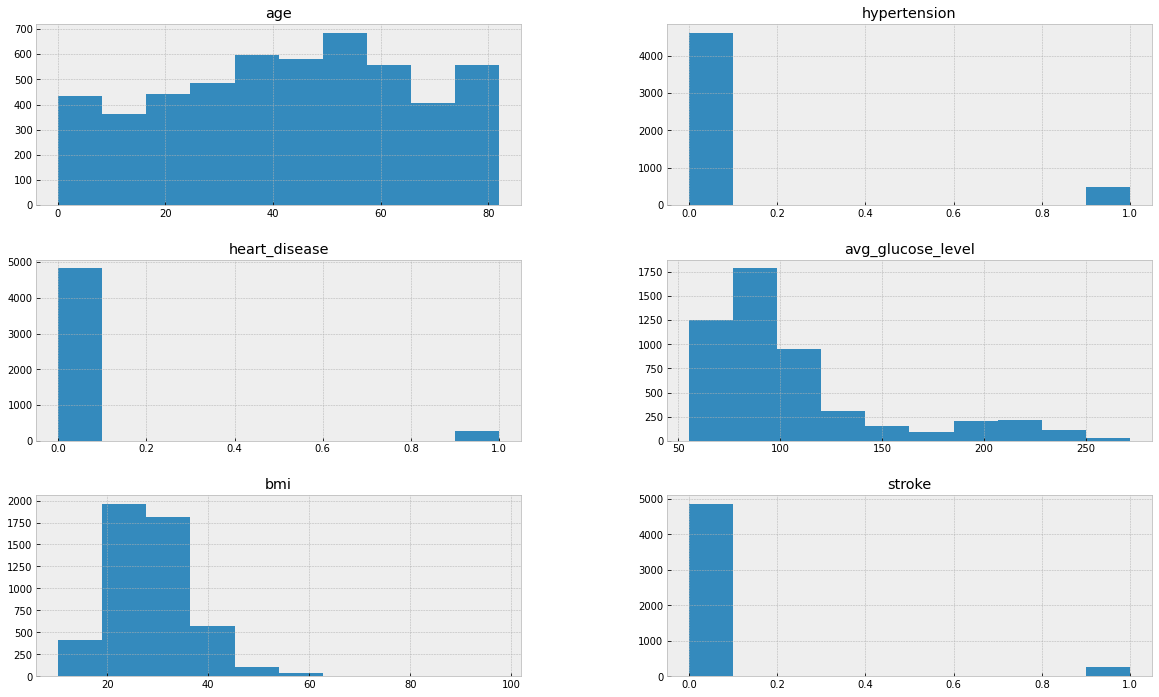

In [10]:
stroke_data.hist(figsize=(20,12))
plt.show()

In [11]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Text(0, 0.5, 'counts')

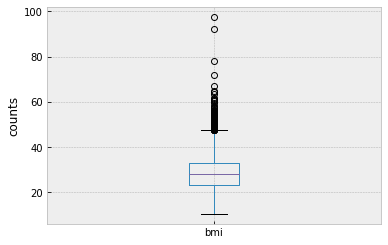

In [12]:
boxplot=stroke_data.boxplot(column=['bmi'])
boxplot.set_ylabel('counts')

In [13]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [14]:
# BMI generally follows normal distribution except some outliers, so we can fill NULL data with median of bmi
stroke_data['bmi'].fillna(28.1, inplace=True)

In [15]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [16]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
# Examine other attributes to see any data missing 

In [18]:
stroke_data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
stroke_data.groupby('gender').count()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115
Other,1,1,1,1,1,1,1,1,1,1


In [20]:
# Only one data is missing in the column of 'Gender', so we removed the missing data
stroke_data=stroke_data.drop(stroke_data[stroke_data['gender']=='Other'].index)

In [21]:
stroke_data.groupby('gender').count()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115


In [22]:
stroke_data.smoking_status.unique() #check the column of smoking status

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [23]:
stroke_data.groupby('smoking_status').count()# one third of data in smoking_status is missing. 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
formerly smoked,884,884,884,884,884,884,884,884,884,884
never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892
smokes,789,789,789,789,789,789,789,789,789,789


In [24]:
pd.crosstab(stroke_data.loc[stroke_data['smoking_status']!='Unknown'].smoking_status,
            stroke_data.loc[stroke_data['smoking_status']!='Unknown'].heart_disease,
)

heart_disease,0,1
smoking_status,,
formerly smoked,807,77
never smoked,1802,90
smokes,728,61


In [25]:
pd.crosstab(stroke_data.loc[stroke_data['smoking_status']!='Unknown'].smoking_status,
            stroke_data.loc[stroke_data['smoking_status']!='Unknown'].ever_married,
)

ever_married,No,Yes
smoking_status,,
formerly smoked,146,738
never smoked,530,1362
smokes,179,610


In [26]:
pd.crosstab(stroke_data.loc[stroke_data['smoking_status']!='Unknown'].smoking_status,
            stroke_data.loc[stroke_data['smoking_status']!='Unknown'].hypertension,
)

hypertension,0,1
smoking_status,,
formerly smoked,764,120
never smoked,1660,232
smokes,695,94


In [27]:
pd.crosstab(stroke_data.loc[stroke_data['smoking_status']!='Unknown'].smoking_status,
            stroke_data.loc[stroke_data['smoking_status']!='Unknown'].Residence_type,
)

Residence_type,Rural,Urban
smoking_status,,
formerly smoked,427,457
never smoked,961,931
smokes,363,426


reseidence type and hypertension have little relation with smoking status

In [28]:
pd.crosstab(stroke_data.loc[stroke_data['smoking_status']!='Unknown'].smoking_status,
            stroke_data.loc[stroke_data['smoking_status']!='Unknown'].work_type,
)

work_type,Govt_job,Never_worked,Private,Self-employed,children
smoking_status,,,,,
formerly smoked,133,0,530,208,13
never smoked,282,14,1211,331,54
smokes,120,0,543,124,2


It can be found that children or people who never worked more likely never smoked, and the people who work in private have high chance of smoking


In [29]:
stroke_data.loc[stroke_data['smoking_status']=='Unknown'].groupby('work_type').count()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
work_type,,,,,,,,,,
Govt_job,122,122,122,122,122,122,122,122,122,122
Never_worked,8,8,8,8,8,8,8,8,8,8
Private,640,640,640,640,640,640,640,640,640,640
Self-employed,156,156,156,156,156,156,156,156,156,156
children,618,618,618,618,618,618,618,618,618,618


In [30]:
pd.crosstab(stroke_data.loc[(stroke_data['smoking_status']!='Unknown')&(stroke_data['work_type'].isin (['Govt_job','Private','Self-employed']))].smoking_status,
            stroke_data.loc[(stroke_data['smoking_status']!='Unknown')&(stroke_data['work_type'].isin (['Govt_job','Private','Self-employed']))].heart_disease,
)

heart_disease,0,1
smoking_status,,
formerly smoked,794,77
never smoked,1734,90
smokes,726,61


In [31]:
pd.crosstab(stroke_data.loc[(stroke_data['smoking_status']!='Unknown')&(stroke_data['work_type'].isin (['Govt_job','Private','Self-employed']))].smoking_status,
            stroke_data.loc[(stroke_data['smoking_status']!='Unknown')&(stroke_data['work_type'].isin (['Govt_job','Private','Self-employed']))].ever_married,
)

ever_married,No,Yes
smoking_status,,
formerly smoked,133,738
never smoked,462,1362
smokes,177,610


People who are working and have no heart_disease probbaly have a high chance of never smoked. For people who are working and have heart disease, if they have never married, they probably are still smoking.

In [32]:
stroke_data.smoking_status[(stroke_data['smoking_status']=='Unknown')&(stroke_data['work_type'].isin (['children','Never_worked']))]='never smoked'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
stroke_data.smoking_status[(stroke_data['smoking_status']=='Unknown')&(stroke_data['heart_disease']== 0)]='never smoked'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
stroke_data.smoking_status[(stroke_data['smoking_status']=='Unknown')&(stroke_data['heart_disease']== 1)&(stroke_data['ever_married']== 'No')]='smokes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
stroke_data.smoking_status[(stroke_data['smoking_status']=='Unknown')&(stroke_data['heart_disease']== 1)&(stroke_data['ever_married']== 'Yes')]='formerly smoked'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
stroke_data.groupby('smoking_status').count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
formerly smoked,925,925,925,925,925,925,925,925,925,925
never smoked,3389,3389,3389,3389,3389,3389,3389,3389,3389,3389
smokes,795,795,795,795,795,795,795,795,795,795


In [37]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
stroke_data.to_csv(file_path+'stroke_data_cleaned.csv', index=False)

In [39]:
stroke_data['gender']=pd.to_numeric(stroke_data['gender'].map({'Female':0, 'Male':1}))#convert gender to numeric variable

In [40]:
stroke_data['ever_married']=pd.to_numeric(stroke_data['ever_married'].map({'No':0, 'Yes':1}))

In [41]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
stroke_data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [43]:
work_dummies = pd.get_dummies(stroke_data['work_type'])
stroke_data = stroke_data.join(work_dummies)

In [44]:
stroke_data.drop(['work_type'],axis=1, inplace=True)

In [45]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
1,0,61.0,0,0,1,Rural,202.21,28.1,never smoked,1,0,0,0,1,0
2,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Urban,83.75,28.1,never smoked,0,0,0,1,0,0
5106,0,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,0,0,0,1,0
5107,0,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,0,0,0,1,0
5108,1,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,0


In [46]:
stroke_data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [47]:
stroke_data['Residence_type']=pd.to_numeric(stroke_data['Residence_type'].map({'Urban':0, 'Rural':1}))

In [48]:
smoking_dummies = pd.get_dummies(stroke_data['smoking_status'])
stroke_data = stroke_data.join(smoking_dummies)
stroke_data.drop(['smoking_status'],axis=1, inplace=True)

In [49]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,83.75,28.1,0,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,0,125.20,40.0,0,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,1,82.99,30.6,0,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,1,166.29,25.6,0,0,0,1,0,0,1,0,0


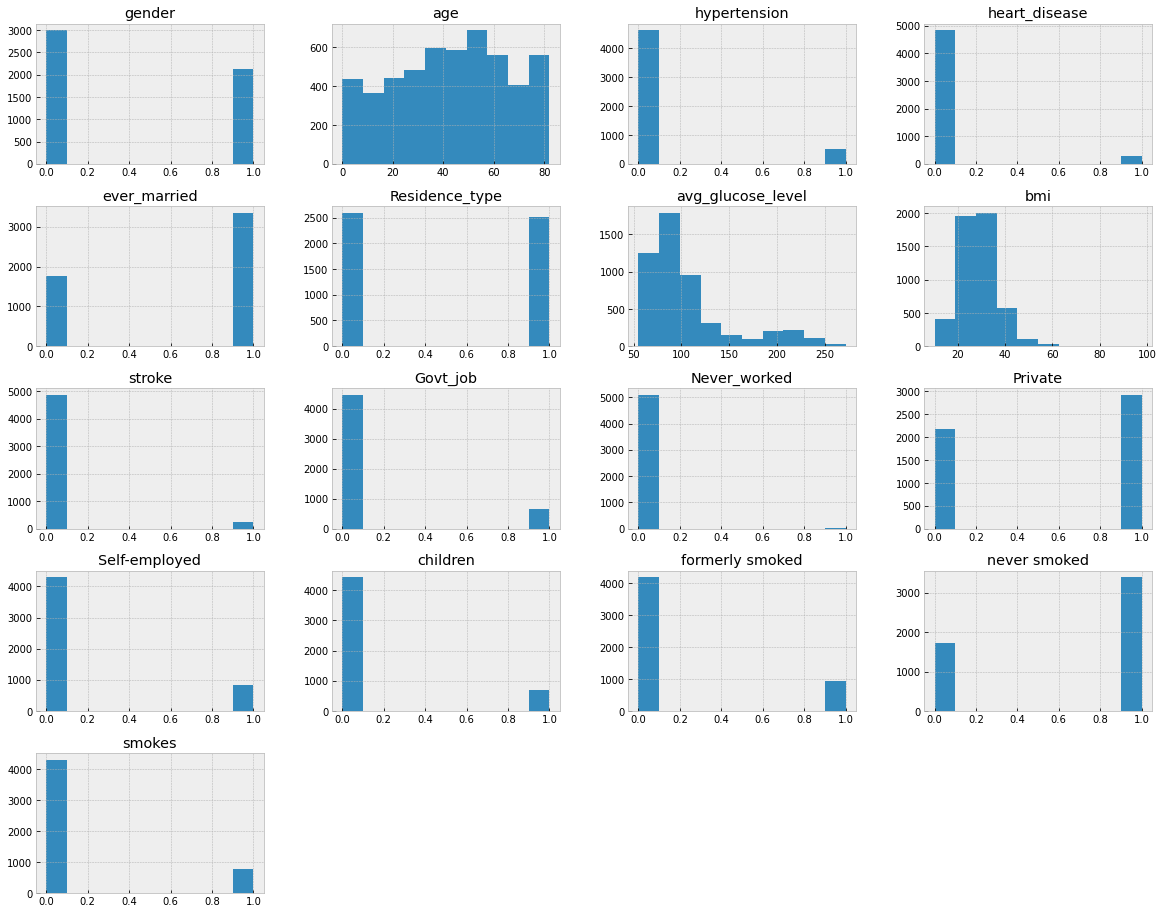

In [50]:
stroke_data.hist(figsize=(20,16))
plt.show()

In [51]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   Residence_type     5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   stroke             5109 non-null   int64  
 9   Govt_job           5109 non-null   uint8  
 10  Never_worked       5109 non-null   uint8  
 11  Private            5109 non-null   uint8  
 12  Self-employed      5109 non-null   uint8  
 13  children           5109 non-null   uint8  
 14  formerly smoked    5109 non-null   uint8  
 15  never smoked       5109 non-null   uint8  
 16  smokes             5109 

In [52]:
stroke_data.to_csv(file_path + 'stroke_data_OHencoded.csv', index=False)